# Get POI data from KOT open api

Get POI data for Seoul and put it to MongoDB (local)

In [43]:
# import libraries
import pandas as pd
import numpy as np
import pymongo
import time
import random
import json
import seaborn as sns

import urllib.request as MyURL
from bs4 import BeautifulSoup
from datetime import datetime
from matplotlib import pyplot as plt

import pickle

In [3]:
# set mongodb
from pymongo import MongoClient 
client = MongoClient('localhost', 27017)

In [4]:
# set database name
db = client['cp_seoul']

In [5]:
# set collection name
collection = db['seoul']

In [5]:
# API key for data.go.kr
key = 'UiZuCz3TStJ3sDC1QBw4lZQYD%2BrwwjibhI5fSSaoGXjP3b00MseMmQ%2FNIPHLqZoVQgt8KVBAaoQ0ob7rQAMblg%3D%3D'

In [ ]:
# API URL for get poi list 
#url = f'http://api.visitkorea.or.kr/openapi/service/rest/EngService/areaBasedList?ServiceKey={key}&contentTypeId=80&areaCode=1&sigunguCode=&cat1=&cat2=&cat3=&listYN=Y&MobileOS=ETC&MobileApp=TourAPI3.0_Guide&arrange=A&numOfRows=240&pageNo=1'

In [ ]:
# Every place in Seoul
url = f'http://api.visitkorea.or.kr/openapi/service/rest/EngService/areaBasedList?ServiceKey={key}&contentTypeId=&areaCode=1&sigunguCode=&cat1=&cat2=&cat3=&listYN=Y&MobileOS=ETC&MobileApp=TourAPI3.0_Guide&arrange=A&numOfRows=1200&pageNo=1'

In [ ]:
# get data from api server
response = MyURL.urlopen(url)

In [ ]:
# parsing with BS4
results = BeautifulSoup(response, "html.parser")

In [ ]:
# parse and make a document for mongo db
row = 0
for result in results.findAll('items'):
    for item in result.findAll('item'):
        row += 1
        record = {}
        for i in item:
            record[i.name] = i.contents[0]
#             print(i.name, i.contents)
#         print(record)
        collection.insert_one(record)

print(row)

#### Get detail information for POI

In [6]:
a_record = (collection.find_one({'contentid': '1266515'}))

In [7]:
a_record

{'_id': ObjectId('5db26b80c36b1f23ca16b568'),
 'addr1': '20, Nambusunhwan-ro 64-gil, Yangcheon-gu, Seoul',
 'areacode': '1',
 'cat1': 'A02',
 'cat2': 'A0202',
 'cat3': 'A02020700',
 'contentid': '1266515',
 'contenttypeid': '76',
 'createdtime': '20110428140717',
 'firstimage': 'http://tong.visitkorea.or.kr/cms/resource/06/2611706_image2_1.bmp',
 'firstimage2': 'http://tong.visitkorea.or.kr/cms/resource/06/2611706_image2_1.bmp',
 'mapx': '126.8300634330',
 'mapy': '37.5274172505',
 'masterid': '1265735',
 'mlevel': '6',
 'modifiedtime': '20190830140812',
 'readcount': '12323',
 'sigungucode': '19',
 'tel': '+82-2-2604-3004',
 'title': 'Seoseoul Lake Park (서서울호수공원)',
 'zipcode': '07916'}

In [8]:
def get_detail(collection, content_id, type_id, key):
    url = f'http://api.visitkorea.or.kr/openapi/service/rest/EngService/detailCommon?ServiceKey={key}&contentTypeId=&contentId={content_id}&MobileOS=ETC&MobileApp=TourAPI3.0_Guide&defaultYN=Y&firstImageYN=Y&areacodeYN=Y&catcodeYN=Y&addrinfoYN=Y&mapinfoYN=Y&overviewYN=Y&transGuideYN=Y'
    response = MyURL.urlopen(url)
    results = BeautifulSoup(response, "html.parser")

    document = collection.find_one({'contentid': content_id})

#     print(url)
    for result in results.findAll('items'):
        for item in result.findAll('item'):
            for i in item:
                if len(i) > 0:
                    document[i.name] = i.contents[0]

    return document


In [9]:
a_record

{'_id': ObjectId('5db26b80c36b1f23ca16b568'),
 'addr1': '20, Nambusunhwan-ro 64-gil, Yangcheon-gu, Seoul',
 'areacode': '1',
 'cat1': 'A02',
 'cat2': 'A0202',
 'cat3': 'A02020700',
 'contentid': '1266515',
 'contenttypeid': '76',
 'createdtime': '20110428140717',
 'firstimage': 'http://tong.visitkorea.or.kr/cms/resource/06/2611706_image2_1.bmp',
 'firstimage2': 'http://tong.visitkorea.or.kr/cms/resource/06/2611706_image2_1.bmp',
 'mapx': '126.8300634330',
 'mapy': '37.5274172505',
 'masterid': '1265735',
 'mlevel': '6',
 'modifiedtime': '20190830140812',
 'readcount': '12323',
 'sigungucode': '19',
 'tel': '+82-2-2604-3004',
 'title': 'Seoseoul Lake Park (서서울호수공원)',
 'zipcode': '07916'}

In [10]:
get_detail(collection, '1266515', '76', key)

{'_id': ObjectId('5db26b80c36b1f23ca16b568'),
 'addr1': '20, Nambusunhwan-ro 64-gil, Yangcheon-gu, Seoul',
 'areacode': '1',
 'cat1': 'A02',
 'cat2': 'A0202',
 'cat3': 'A02020700',
 'contentid': '1266515',
 'contenttypeid': '76',
 'createdtime': '20110428140717',
 'firstimage': 'http://tong.visitkorea.or.kr/cms/resource/06/2611706_image2_1.bmp',
 'firstimage2': 'http://tong.visitkorea.or.kr/cms/resource/06/2611706_image2_1.bmp',
 'mapx': '126.8300634330',
 'mapy': '37.5274172505',
 'masterid': '1265735',
 'mlevel': '6',
 'modifiedtime': '20190830140812',
 'readcount': '12323',
 'sigungucode': '19',
 'tel': '+82-2-2604-3004',
 'title': 'Seoseoul Lake Park (서서울호수공원)',
 'zipcode': '07916',
 'directions': 'Hwagok Station (Seoul Subway Line 5), Exit 5.<br>Take Bus No. 652, 6627 or 6625, and get off at Seoseoul Lake Park Bus Stop.',
 'dongcode': '16',
 'homepage': '<a href="http://www.yangcheon.go.kr/" target="_blank" class="web" title="new window popup">www.yangcheon.go.kr</a> (Korean, Engl

#### Loop through for all POIs in seoul


In [6]:
cursors = collection.find()

In [7]:
print(f'start at : {datetime.now()}')
row = 0

new_collection = db['seoul_poi']

for cursor in cursors:
    content_id = cursor['contentid']
    type_id = cursor['contenttypeid']

    row += 1
        
    poi_detail = get_detail(collection, content_id, type_id, key)
    new_collection.insert_one(poi_detail)
    print(f'{row} : update {content_id} at {datetime.now()}')
    
#     new_value = {'$set': get_detail(collection, content_id, type_id, key)}
#     content_query = {'contentid': content_id}
#     collection.update_one(content_query, new_value)

    #time.sleep(random.randint(4, 10))
    
print(f'end at : {datetime.now()}')

    

start at : 2019-12-16 11:10:27.735701


NameError: name 'get_detail' is not defined

In [8]:
# Retrieve data sample(경복궁)
new_collection = db['seoul_poi']
cursors = new_collection.find({'contentid': '264337'})

In [9]:
for cursor in cursors:
    cursor.pop('_id')
    app_json = json.dumps(cursor, sort_keys=True)
    print(app_json)

{"addr1": "161, Sajik-ro, Jongno-gu, Seoul", "areacode": "1", "cat1": "A02", "cat2": "A0201", "cat3": "A02010100", "contentid": "264337", "contenttypeid": "76", "createdtime": "20110225172850", "directions": "[Subway]<br />\nGyeongbokgung Station (Seoul Subway Line 3) and Exit 5.<br/>\nAnguk Station (Seoul Subway Line 3) and Exit 1. <br /><br />\n\n[Bus]<br />\nTake Bus No. 1020, 7025,109, 171, 172, 601 or 606 and get off at Gyeongbokgung Palace Bus Stop.<br /><br />\n\nTake Jongno Bus No. 11 and get off at National Folk Musuem of Korea Bus Stop.", "dongcode": "36", "firstimage": "http://tong.visitkorea.or.kr/cms/resource/40/1568040_image2_1.jpg", "firstimage2": "http://tong.visitkorea.or.kr/cms/resource/40/1568040_image3_1.jpg", "homepage": "<a title=\"New window popup\" href=\"http://www.royalpalace.go.kr/\" target=\"_blank\">www.royalpalace.go.kr</a> (Korean, English)<br>\n <a title=\"New window popup\" href=\"http://www.palaceguide.or.kr/\" target=\"_blank\">www.palaceguide.or.kr</

### Understanding the dataset

In [10]:
# Put the data into dataframe
cursor = new_collection.find()

# Expand the cursor and construct the DataFrame
df =  pd.DataFrame(list(cursor))

# Delete the _id
del df['_id']


In [11]:
cursor = new_collection.find({'title': {"$regex": u"Bongeunsa"}})

In [12]:
for row in cursor:
    print(row['title'], row['contentid'])

Bongeunsa Temple (Seoul) (봉은사 (서울)) 264594


In [13]:
df.head().T

,0,1,2,3,4
addr1,"38, Donggyo-ro 29-gil, Mapo-gu, Seoul","31, Daehak-ro 12-gil, Jongno-gu, Seoul","3rd floor, 26, Eulji-ro 9-gil, Jung-gu, Seoul","22 Apgujeong-ro 8-gil, Gangnam-gu, Seoul","13th floor, 57, Myeongdong 2-gil, Jung-gu, Seoul"
addr2,NaN,NaN,NaN,NaN,NaN
areacode,1,1,1,1,1
cat1,A05,A02,B02,A04,B02
cat2,A0502,A0206,B0201,A0401,B0201
cat3,A05020900,A02060600,B02010900,A04010600,B02010900
contentid,2480979,1240735,2444381,2009231,2542774
contenttypeid,82,78,80,79,80
createdtime,20170214145634,20110324102837,20161201153253,20150610141921,20180412102855
directions,[Subway]<br />\nHongik Univ. Station (Seoul Su...,[Subway]<br>Haehwa Station (Seoul Subway Line ...,Available,[Subway]<br>\nSinsa Station (Seoul Subway Line...,Available


In [14]:
content_types = {
    82: "음식(82)Dining",
    76: "관광지(76)TouristAttractions",
    79: "쇼핑(79)Shopping",
    78: "문화시설(78)Cultural Facilities",
    80: "숙박(80)Accommodation",
    85: "축제/공연/행사(85)Festivals/Events/Performances",
    75: "레포츠(75)Leisure/Sports",
    77: "교통(77)Transportation",    
}


In [15]:
# Histogram for readcount
content_type_count = df.contenttypeid.value_counts()

In [16]:
content_type_count

82    263
76    262
79    215
78    161
80    156
85     87
75     26
77     11
Name: contenttypeid, dtype: int64

In [17]:
# 음식 카테고리만 출력
for _, row in df.iterrows():
    if row['contenttypeid'] == '82':
        print(row['title'])

17℃ (17도씨)
63 Buffet Pavilion (63뷔페 파빌리온)
Aedogin (에도긴)
Ali Baba (알리바바)
Alla Prima (알라 프리마)
Andong Guksi (안동국시)
Aoi Tori (아오이토리)
Areumdaun Cha Bangmulgwan (Beautiful Tea Museum) (아름다운차박물관)
Arirang (아리랑)
B-hind (비하인드)
Baba India - Gangnam Branch (바바인디아 (강남역점))
Badalbi (바달비)
Baekje Samgyetang (백제삼계탕)
Baengnyeon Samgyetang (백년토종삼계탕)
Baengnyeonok (백년옥)
Baerlin (베어린)
Balwoo Gongyang (사찰음식 전문점 발우공양)
Bistro74 (비스트로74)
Bo Reum Soei (보름쇠)
Bongpiyang (Bangi Branch) (봉피양 방이점)
Bongraeheon (Mayfield Hotel) (봉래헌(메이필드호텔))
Bua (부아)
Buchon Yukhoe (부촌육회)
Bugakjeong Isang Galbi (북악정-이상갈비)
Bugeogukjip (북어국집)
Bukmakgol (북막골)
BuonaSera (보나세라)
Busan Sikdang (부산식당)
Busanbokjip (부산복집)
Ca'del Lupo (까델루뽀)
Cacao Boom (Itaewon Branch) (카카오봄(이태원점))
Cacaodada (카카오 다다)
Café De Paris (카페드파리)
Café Moon (달 카페)
Canadian Lobster (카나디안 랍스터)
Châtaigne (샤떼뉴)
Chakraa (Hannam Branch) (차크라(한남점))
Chammanna (참만나)
Chamsutgol (참숯골)
Chanyangjip (찬양집)
Cheongsu Hoetjip (Formerly Eushim) (청수횟집)
Chikibaitu (Chickyx2) - Ewha Woman's Univ

### Visualization with folium

In [23]:
import folium

In [24]:
df.mapx = pd.to_numeric(df.mapx)

In [25]:
df.mapy = pd.to_numeric(df.mapy)

In [26]:
center_coord = (df.mapy.mean(), df.mapx.mean())

In [27]:
center_coord

(37.51909343531988, 126.88651275411688)

In [28]:
f_map = folium.Map(location=center_coord, zoom_start=12)

In [29]:
for _, row in df.iterrows():
    
    icon = folium.Icon(color='blue')
    if row['contenttypeid'] == '82':
        # Food
        icon.color = 'red'
    elif row['contenttypeid'] == '76':
        # 관광지
        icon.color = 'green'
    elif row['contenttypeid'] == '79':
        # 쇼핑
        icon.color = 'orange'
    elif row['contenttypeid'] == '80':
        # 숙박
        icon.color = 'purple' 
    
    if not (np.isnan(row['mapy']) or np.isnan(row['mapx'])):
        folium.Marker(location=[row['mapy'], row['mapx']], 
                      popup=row['title'], 
                      icon=icon).add_to(f_map)
    else:
        print(row['title'])


Art Korea Inc.(아트코리아)
Hapjeong-dong Café Street (합정동 카페거리)
International Seon Center (국제선센터)
Inwoo House (인우하우스)


In [30]:
display(map)

map

### Vectorizing by TD-IDF values with overview

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.decomposition import TruncatedSVD

from nltk.tokenize import word_tokenize

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [29]:
ngrams_1 = {
    'ngram_range': (1, 1),
    'stop_words': 'english',
    'dtype': 'int32',
    'strip_accents': 'unicode',
    'decode_error': 'replace',
    'analyzer': 'word',
    'min_df': 2
}

In [30]:
tfidf = TfidfVectorizer(ngrams_1)

In [31]:
# cleaning text
from functions import remove_html, remove_newline

In [32]:
# Replace NA with ''
df.overview = df.overview.fillna('')

In [33]:
overviews = list(df['overview'])

In [34]:
overviews[:5]

['17℃ stands for the optimum temperature to preserve chocolates at its best quality. Presenting a wide variety of hand-made chocolates, purchasable items include chocolate bars and café menus like chocolate cakes and chocolate beverages. In particular, you can control the amount of cacao in your chocolate drink ranging from 40%~80% according to your preference.',
 '1m Classic Art Hall, located in Daehang-ro is a classic art experience center exclusively for children. The center provides children with the opportunity to enjoy classical music in a fun and interesting way. In the ‘1m Experience Classic’ program (the oldest children’s classical program in the nation), teachers not only provide interesting mini-music learns, but also assist children in trying out a variety of instruments.<br><br>\n\nAt the performance halls at the 1m Classic Art Hall, the stage is just 1m away from the surrounding seats, giving young audience members a more intimate musical experience.',
 "Situated in the m

In [35]:
# need to clean the markup characters (<Br>, \n, ...)
overviews = list(map(remove_html, overviews))
overviews = list(map(remove_newline, overviews))

In [36]:
# get TF-IDF values
tfidf_values = tfidf.fit_transform(df['overview'])

In [37]:
tfidf_values.shape

(1181, 9988)

In [38]:
# Reduce dimensions for Chart
svd = TruncatedSVD(n_components=3)
svd_values = svd.fit_transform(tfidf_values)

In [39]:
svd_values

array([[ 0.14462705, -0.00671009,  0.0758099 ],
       [ 0.24511805, -0.06153638, -0.04640717],
       [ 0.41434117,  0.1625916 , -0.01037849],
       ...,
       [ 0.        , -0.        ,  0.        ],
       [ 0.        , -0.        ,  0.        ],
       [ 0.        , -0.        ,  0.        ]])

In [44]:
# dump vectors to file with pickle
# for deployment
with open('poi_vectors', 'wb') as f:
    pickle.dump(svd_values, f)
    

In [49]:
with open('poi_df', 'wb') as f:
    pickle.dump(df, f)

In [40]:
# Coloring by category: Food : Red, Sightseeing : Green, Shopping : Blue, Lodging : Purple
C = []
for idx, row in df.iterrows():    
    if row['contenttypeid'] == '82':
        # Food
        C.append('r')
    elif row['contenttypeid'] == '76':
        C.append('g')
    elif row['contenttypeid'] == '79':
        # 쇼핑
        C.append('b')
    elif row['contenttypeid'] == '80':
        # 숙박
        C.append('purple')
    else:
        C.append('gray')
        

In [41]:
# Set list for chart (X, Y, Z and Colors)
X = []
Y = []
Z = []
CC = []

for idx, c in enumerate(['r', 'g', 'b', 'purple', 'gray']):
    x = []
    y = []
    z = []
    cc = []
    for id, i in enumerate(svd_values):
        if C[id] == c:
            x.append(i[0])
            y.append(i[1])            
            z.append(i[2])
            cc.append(C[idx])
    X.append(x)
    Y.append(y)
    Z.append(z)
    CC.append(cc)

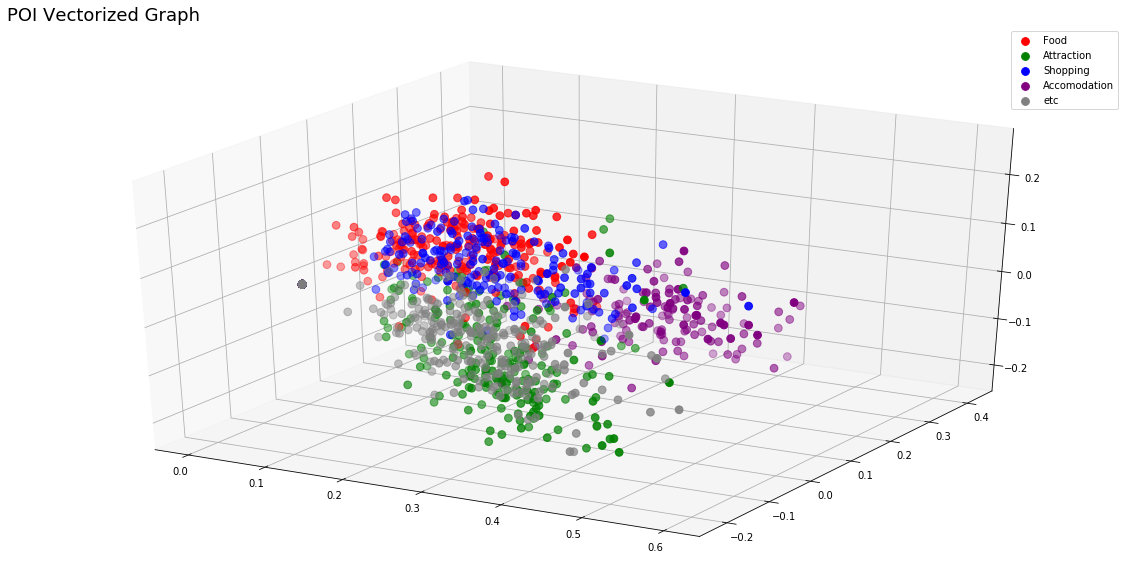

In [42]:
fig = plt.figure(figsize=(20,10))
labels = ['Food', 'Attraction', 'Shopping', 'Accomodation', 'etc']
ax = fig.add_subplot(111, projection='3d')
for idx, c in enumerate(['r', 'g', 'b', 'purple', 'gray']):
    ax.scatter(X[idx], Y[idx], Z[idx], color=c, s=60, label=labels[idx])

ax.legend()
ax.set_title('POI Vectorized Graph', fontdict={'fontsize': 18}, loc='left')
plt.show()


#### Compare vectors

In [46]:
# Find index value for POI
df[df['title'].str.contains('강남')][['title', 'contentid', 'overview']]

,title,contentid,overview
51,Baba India - Gangnam Branch (바바인디아 (강남역점)),556174,Baba India is a traditional Indian cuisine res...
72,Best Western Premier Gangnam Hotel (베스트웨스턴 프리미...,782947,Best Western International is a worldwide chai...
293,Gangnam (강남),264571,Gangnam Subway Station area is the prime distr...
294,Gangnam Station Underground Shopping Center (강...,2021659,Consumers in their 20s to 30s are frequent vis...
320,Goto Mall (Gangnam Terminal Underground Shoppi...,1356028,Gangnam Terminal Underground Shopping Center i...
562,Kakao Friends Gangnam Flagship Store (카카오프렌즈 강...,2579444,Kakao Friends Gangnam Flagship Store features ...
606,Kumkang - Gangnam Branch (Main store) (금강제화 (강...,1326661,Kumkang Shoes is Korea's leading fashion retai...
784,"Novotel Ambassador Gangnam, Seoul (노보텔 앰배서더 강남)",349257,"The Novotel Ambassador Gangnam, Seoul is one o..."
995,Seven Luck Casino - Gangnam COEX (세븐럭카지노(강남코엑스점)),495641,"Everyone’s favorite, Korean Las Vegas – Seven ..."
999,Sheraton Seoul Palace Gangnam Hotel (쉐라톤 서울 팔래...,349263,


In [47]:
X = [i[0] for i in svd_values]
Y = [i[1] for i in svd_values]
Z = [i[2] for i in svd_values]

def compare_vectors(idx_1, idx_2):
    value_a = (X[idx_1], Y[idx_1], Z[idx_1])
    value_b = (X[idx_2], Y[idx_2], Z[idx_2])
    
    # !!!!check how to get_distance between 3d vectors
    diff = abs(X[idx_1] - X[idx_2]) + abs(Y[idx_1] - Y[idx_2]) + abs(Z[idx_1] - Z[idx_2])
    
    return diff, value_a, value_b

In [48]:
# 경복궁 vs 남산타워
compare_vectors(359, 748)

(0.3199535864090199,
 (0.3834976649458588, -0.18753100574093304, -0.13461760661169705),
 (0.2859587857385381, -0.023065357085753087, -0.07666854806517777))

In [49]:
# 경복궁 vs 창경궁
compare_vectors(359, 133)

(0.1267153578243151,
 (0.3834976649458588, -0.18753100574093304, -0.13461760661169705),
 (0.4991593852703721, -0.19039053812022547, -0.12642350149118772))

In [50]:
# 남산타워 vs 롯데월드타워
compare_vectors(748, 653)

(0.20526823662174865,
 (0.2859587857385381, -0.023065357085753087, -0.07666854806517777),
 (0.4288209362652045, -0.06996039822136424, -0.06115750310570667))

In [51]:
# 북촌한옥마을 vs 강남
compare_vectors(98, 293)

(0.343568595726038,
 (0.28122535377228836, -0.07023761998432801, 0.05055228307062031),
 (0.3696432995714459, 0.06758414262012877, -0.06677660425180332))

#### Make function for get similar places

In [60]:
# extract vectors to tuple array
vectors = [(i[0], i[1], i[2]) for i in svd_values]

In [61]:
# get similar places function
def get_similar(index):
    """Returns similar places of indiced place"""
    X = vectors[index][0]
    Y = vectors[index][1]
    Z = vectors[index][2]
 
    distances = []
    for i, value in enumerate(vectors):
        distance = (abs(X - value[0]) + abs(Y - value[1]) + abs(Z - value[2]), i)
        distances.append(distance)

    top5_similars = [i[1] for i in sorted(distances)[0:6]]
    
    distance_df = pd.DataFrame(distances)
    
    result = pd.DataFrame(df.loc[top5_similars][['title', 'contentid', 'overview']])
    result = pd.merge(result, distance_df.loc[top5_similars], left_index=True, right_index=True)
    
    result = result.rename({0:'distance'}, axis='columns')

    return result


#### Get similar places

In [62]:
# 북촌한옥마을
get_similar(98)

,title,contentid,overview,distance,1
98,Bukchon Hanok Village (북촌한옥마을),561382,"Surrounded by Gyeongbokgung Palace, Changdeokg...",0.000000,98
71,Beautiful Tea Museum (아름다운 차박물관),268218,"Located in Insa-dong, The Beautiful Tea Museum...",0.020792,71
936,Seoul Folk Flea Market - Traditional Arts & C...,1371199,The Traditional Arts & Crafts Studio at Seoul ...,0.034659,936
480,Injeongwon - Gildong Main Branch (인정원-길동본점),554553,"'Vietnamssam Injeongwon,' keeping the new tren...",0.049526,480
600,Korean Museum of Straw and Life (짚풀생활사박물관),2603951,Korean Museum of Straw and Life is a private m...,0.053109,600
818,Passion 5 (패션5),1151309,Passion 5 is located near Hangangjin Station i...,0.057366,818


In [55]:
# 남산서울타워
get_similar(748)

,title,contentid,overview,distance,1
748,Namsan Seoul Tower (남산서울타워),264550,Namsan Seoul Tower was the first tower-type to...,0.000000,748
755,Nanji Hangang Park (Nanji Camping Site) (한강시민공...,767100,"As part of the Hangang Renaissance project, Na...",0.025919,755
161,Children’s Grand Park (서울 어린이대공원),1051832,"Situated in Gwangjin-gu, Seoul Children’s Gran...",0.038376,161
664,Mapo Art Center (마포아트센터),1145438,Mapo Art Center is an innovative cultural art ...,0.041715,664
1043,Suraksan Mountain (수락산),1253587,Along with the other great mountains near Seou...,0.042826,1043
217,Dobongsan Mountain (도봉산),1742421,"Dobongsan Mountain, located northeast of Bukha...",0.044176,217


In [56]:
# 롯데월드타워
get_similar(653)

,title,contentid,overview,distance,1
653,Lotte World Tower Seoul Sky (롯데월드타워 서울스카이),2493015,Seoul Sky is located on floors 117-123 of Lott...,0.000000,653
886,Sang Sang Tok Tok Gallery (상상톡톡 미술관),1114538,"The Children’s Gallery, located in Seoul’s ‘No...",0.043886,886
872,Samcheonggak (삼청각),268177,Reflecting its name (literally the ‘House with...,0.054772,872
387,Hangaram Art Museum in Seoul Arts Center (예술의전...,1312802,"Hangaram Art Museum, located in the left wing ...",0.058029,387
721,Myeongdong Nanta Theatre (명동난타극장),651452,The Myeongdong Nanta Theatre is located on the...,0.062122,721
338,Gwanaksan Mountain (관악산),1562674,"At 632.2 meters in x_height, Gwanaksan Mountai...",0.066985,338


In [57]:
# 경복궁
get_similar(359)

,title,contentid,overview,distance,1
359,Gyeongbokgung Palace (경복궁),264337,"Built in 1395, Gyeongbokgung Palace is also co...",0.000000,359
245,Doseonsa Temple (도선사),1348684,"Doseonsa Temple was established 1,100 years ag...",0.039182,245
964,Seoul Museum of History (서울역사박물관),268127,Seoul Museum of History captures the tradition...,0.044058,964
710,"Museum of Art, Seoul National University (서울대학...",1752538,"Museum of Art, Seoul National University was e...",0.048159,710
546,Jongmyo Shrine [UNESCO World Heritage] (종묘 [유네...,264351,Jongmyo Shrine was a primary place of worship ...,0.052242,546
538,Jingwansa Temple (Seoul) (진관사 (서울)),1158841,"Jingwansa Temple, located to the west of Seoul...",0.056457,538


#### TF-IDF gives meaningful result about similarity between POIs, let's make a web app with this model

In [27]:
df.loc[0, 'overview'][:30]

'17℃ stands for the optimum tem'

In [52]:
df[df['contentid']=='264337']

,addr1,addr2,areacode,cat1,cat2,cat3,contentid,contenttypeid,createdtime,directions,...,masterid,mlevel,modifiedtime,overview,readcount,sigungucode,tel,telname,title,zipcode
359,"161, Sajik-ro, Jongno-gu, Seoul",NaN,1,A02,A0201,A02010100,264337,76,20110225172850,[Subway]<br />\nGyeongbokgung Station (Seoul S...,...,126508,6,20190729165835,"Built in 1395, Gyeongbokgung Palace is also co...",1584257,23,+82-2-3700-3900,NaN,Gyeongbokgung Palace (경복궁),03045


In [82]:
# get similar places function
def get_similar_list(index):
    """Returns similar places of indiced place"""
    X = vectors[index][0]
    Y = vectors[index][1]
    Z = vectors[index][2]
 
    distances = []
    for i, value in enumerate(vectors):
        distance = (abs(X - value[0]) + abs(Y - value[1]) + abs(Z - value[2]), i)
        distances.append(distance)

    top5_similars = [i[1] for i in sorted(distances)[0:6]]
      
    result = []
    i = 0
    for _, row in df.loc[top5_similars].iterrows():
        item = {
            'title': row['title'],
            'contentid': row['contentid'],
            'overview': row['overview'],
            'note': row['overview'][:200] + '...',
            'firstimage': row['firstimage'],
            'modifiedtime': row['modifiedtime'],
            'distance': distances[i][0]
        }
        result.append(item)
        i += 1
    
    return result
#     result = pd.merge(result, distance_df.loc[top5_similars], left_index=True, right_index=True)
    
#     result = result.rename({0:'distance'}, axis='columns')

#     return result



In [83]:
get_similar_list(748)

[{'title': 'Namsan Seoul Tower (남산서울타워)',
  'contentid': '264550',
  'overview': 'Namsan Seoul Tower was the first tower-type tourism spot in Korea. The top of the tower is at almost 480 meters above sea level, including Namsan Mountain (243m) and the tower’s own x_height (236.7m), making it one of the tallest towers in Asia. It is comprised of Seoul Tower Plaza, recently opened to public access after 40 years, and N Seoul Tower, operated by CJ Foodville since 2005. The tower was first established as a broadcasting tower to send out TV and radio signals in 1969. As of now, it has become one of the representative landmarks and multi-cultural venues in Seoul.',
  'note': 'Namsan Seoul Tower was the first tower-type tourism spot in Korea. The top of the tower is at almost 480 meters above sea level, including Namsan Mountain (243m) and the tower’s own x_height (236.7m),...',
  'firstimage': 'http://tong.visitkorea.or.kr/cms/resource/30/2477030_image2_1.jpg',
  'modifiedtime': '20191025145

In [102]:
cur = new_collection.find({'overview': { "$regex": "^[\s\S]{0,}$" }})

In [103]:
list(cur)

[{'_id': ObjectId('5db26b80c36b1f23ca16b1d9'),
  'addr1': '38, Donggyo-ro 29-gil, Mapo-gu, Seoul',
  'areacode': '1',
  'cat1': 'A05',
  'cat2': 'A0502',
  'cat3': 'A05020900',
  'contentid': '2480979',
  'contenttypeid': '82',
  'createdtime': '20170214145634',
  'firstimage': 'http://tong.visitkorea.or.kr/cms/resource/87/2479687_image2_1.jpg',
  'firstimage2': 'http://tong.visitkorea.or.kr/cms/resource/87/2479687_image3_1.jpg',
  'mapx': '126.9230428662',
  'mapy': '37.5621620943',
  'masterid': '2479328',
  'modifiedtime': '20190125151640',
  'readcount': '3832',
  'sigungucode': '13',
  'title': '17℃ (17도씨)',
  'zipcode': '03984',
  'directions': '[Subway]<br />\nHongik Univ. Station (Seoul Subway Line 2, Gyeongui-Jungang Line, Airport Railroad), Exit 3.<br />\nWalk for approx. 5 min.<br><br>\n\n[Bus]<br />\nKolon Apt. 106-dong Entrance Bus Stop<br />\nKolon Apt. 104-dong Entrance Bus Stop<br />\nDaemyeong Apt. Bus Stop<br />\nMaeul Mapo 05',
  'dongcode': '27',
  'homepage': '<a t